# MULTI LAYERED NEURAL NETWORK

## Non-Linear Activation Functions

*To make a neuron become non-linear, we apply a non-linear activation function to the weighted sum of its inputs*
*An example non-linear activation function is the logistic or sigmoid activation function defined as*
$$f(x) = \frac{1}{1+e^{-\alpha{x}}}$$
*let us plot the this function and show its nonlinear behaviour for different values of $\alpha$*


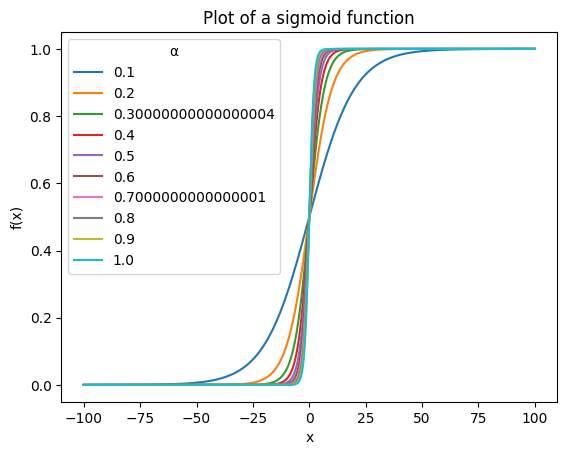

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

alphas = np.linspace(0.1,1,10)
for alpha in alphas:
    x = np.linspace(-100,100,1000)
    fx = 1/(1+np.exp(-alpha*x))
    plt.plot(x,fx)
plt.ylabel('f(x)')
plt.xlabel('x')
plt.title('Plot of a sigmoid function')
plt.legend(alphas,title='\u03B1')

***What are the advantages of the sigmoid functions?***
1. ***Unipolar closed range of $f(x)$*** 

    The output $f(x)$ is constrained between 0 and 1 as the input explodes towards positive infinity or negative infinity:
    $$ 0 \le f(x) \le 1 $$
    
2. ***Simple Derivative*** 

    A simpler derivative means easy computation of cost function gradient with respect to weights. The importance of this will be seen more clearly when dsicussing back propagation and in the next chapter when discussing the delta rule
    $$ f^{'}(x) = \frac{\partial{f(x)}}{\partial{x}} = \alpha{f(x)}(1-f(x)) $$

Let us see if another non-linear activation function conforms to this paarticularly its derivative, is it simple or complex.
 
*This activation function is called the tangent-hyperbolic or tangent-sigmoid function and it is defined as:*
$$ f(x) = \frac{e^{\alpha{x}}-e^{-\alpha{x}}}{e^{\alpha{x}}+e^{-\alpha{x}}} $$

Lets plot this function

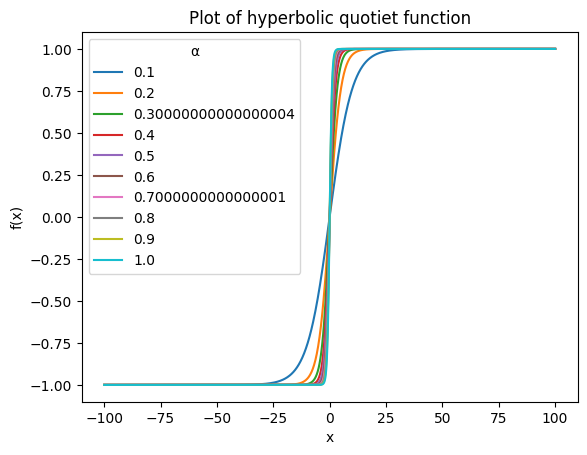

In [2]:
alphas = np.linspace(0.1,1,10)
for alpha in alphas:
    x = np.linspace(-100,100,1000)
    fx = (np.exp(alpha*x)-np.exp((-alpha*x)))/(np.exp(alpha*x)+np.exp(-alpha*x))
    plt.plot(x,fx)
plt.ylabel('f(x)')
plt.xlabel('x')
plt.title('Plot of hyperbolic quotiet function')
plt.legend(alphas,title='\u03B1')

So we see that in the case of the tangent-hyperbolic function:
1. ***Bipolar closed range of $f(x)$***

    The output $f(x)$ is constrained between -1 and 1 as the input explodes towards positive infinity or negative infinity:
    $$ -1 \le f(x) \le 1 $$

2. ***Derivative of $f(x)$ is also simple***

    $$ f^{'}(x) = \frac{\partial{f(x)}}{\partial{x}} = \alpha{(1+f(x))}(1-f(x)) $$

## Gradient Descent Rule for Singe -Layered Nonlinear Feedforward Neural Network

From this point henceforth, unless stated otherwise, we assume that the sigmoid activation function is used for non-linear neurons and neural networks.

Also we have a few questions:

- Does the weight update rule discussed for a linear neuron in the previous chapter change for a non-inear neuron?
- If so how does it change?
- How is the cost function affected by the change in the nature of the cost function from being linear to being non-linear?
- What about the gradient of the cost function with respect to the weights?
- If so how?

For the first question, the answer is no, thus the second question becomes irrelevant, the weight update rule does not change it still remains in its various forms as:
$$ w^{new}_i = w^{old}_i + \eta{\frac{\partial{E}}{\partial{w_i}}} $$
$$ w^{new}_i = w^{old}_i + \eta{\delta{x_i(k)}} $$
$$ : \delta = \sum_k \delta{(k)} $$

***Go through lecture 2 lab ntebook if you dont understand the notations of the weight update rule***

For the third question, the cost function definition does not change, $y^pred(k) = f(x(k))$ where $x(k)$ is the weighted sum of the inpts of the neuron. But what does change is the gadient of the cost function with respect to the weights. This answers our fourth question. For the fifth question, how?

For a linear neuron:
$$ \delta{(k)} = y(k) - y^{pred}(k) $$
But in te case of the activation function being non-linear, in our case, the sigmoid function:
$$ \delta{(k)} = y^{pred}(k)(1-y^{pred}(k))(y(k) - y^{pred}(k)) $$


## Linear VS Non-linear Feedforward Neural Networks

Is the outut closed range nature of non-linear neurons and the simplicity of their derivative good enough reason to prefer the non-linear neurons to linear neurons?

The answer is yes for many reasons not to be invesstigated yet, but there are other reasons and inspiratins that brought about the advent of non-linear neurons which will be discussed here and they include:

1. Linear seperability
2. Non-linear serparability
3. The XOR problem

***Linear Sepearability***

A function is linearly seperable if a hyperplane exists in the function that seperates one class from the other

In this case an hyperplane is a 1D function

Let us define the function to be tested for linear seprebility using a table. The function will be the OR function.Run the cell below to generate and plot the data from the OR function.

In [3]:
import pandas as pd
import seaborn as sns
x1 = np.array([-1, -1, 1, 1])
x2 = np.array([-1, 1, -1, 1])
y = np.array([-1, 1, 1, 1])
or_data = pd.DataFrame(np.array([x1,x2,y]).T,columns=['x1','x2','y'])
print(or_data.to_string(index=False))

 x1  x2  y
 -1  -1 -1
 -1   1  1
  1  -1  1
  1   1  1


Now let us define a hyperplane function as a table, then we plot this hyperplane function and the OR function also to illustrate linear seerability

<AxesSubplot: xlabel='x1', ylabel='x2'>

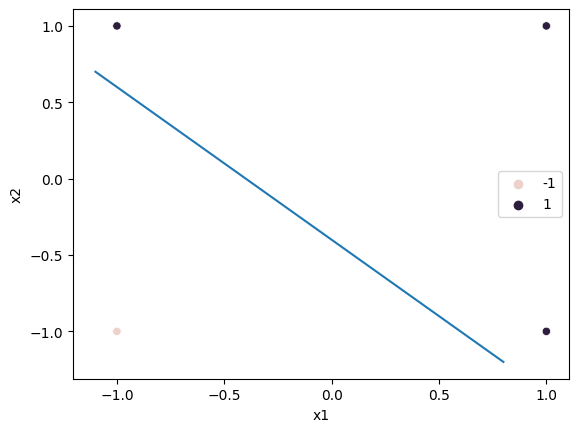

In [4]:
sns.scatterplot(or_data,x='x1',y='x2',hue='y')
hyperplane_fn = np.array([np.arange(1,-1,-0.1)-0.2,np.arange(-1,1,0.1)-0.2]).T
hyperplane_fn = pd.DataFrame(hyperplane_fn,columns=['c1','c2'])
sns.lineplot(hyperplane_fn,x='c1',y='c2')

We see that the hyperplane function depicted by the blue line is able to seperate the +1 outputs of the OR function from the -1 outputs ofthe OR function, therfore the OR function is linearly seperable.

A linear neuron is able to deal identify the outputs fo categorical functions if there exists a linear hyperplane that seperates the categories. Now lets look at the counterpart, non-linear seperability.

***Non-linear seperability***

For non-linear seperable function, its categories cannot be seperated by a linear hyperplane, rather a non-linear function is needed to be able to identify its categories distinctly. One of such os the XOR function. Let us generate a data as done for the OR function and see why the XOR function is a non-linear seperable function.

Run the cell below to generate the XOR function data and plot it, and then you will see that, it would be difficult to find a linear hyperplane function that sperates the two categories in the output y distinctly.

A better option is to make use of a non-linear neuron to approximate the XOR function

***ASSIGNMENT: Re-write the gradient descent function from lecture 2 to make use of a non-linear neuron and to approxiate the XOR function***

So in essence, apart from the mathematical ease that non-linear neurons offer, they came about due to the inability of linear neurons to approximate some functions such as the XOR function. Also most real world problems and systems are non-linear.

 x1  x2  y
 -1  -1 -1
 -1   1  1
  1  -1  1
  1   1 -1


<AxesSubplot: xlabel='x1', ylabel='x2'>

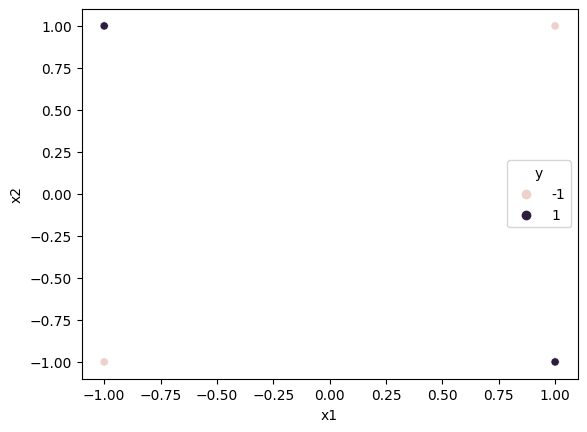

In [5]:
x1 = np.array([-1, -1, 1, 1])
x2 = np.array([-1, 1, -1, 1])
y = np.array([-1, 1, 1, -1])
xor_data = pd.DataFrame(np.array([x1,x2,y]).T,columns=['x1','x2','y'])
print(xor_data.to_string(index=False))
sns.scatterplot(xor_data,x='x1',y='x2',hue='y')

## Multi-Layered Neural Networks(Non-linear and feedforward)

From now henceforth we will no longer deal with single neurons, rather we will deal with group of neurons arranged in succesful layers. They form a feedforward network as data is only allowed to flow in the forward direction.

We have learnt how to train linear and non-linear neurons, but what of multiple neurons working together to model a system. One of such is a multilayered feedforward neural network. This neural network is made up of mulitple layers of mulitple neurons. The input of each layer is connected to the output of all the neurons from the previous layer. How do we train the weights of every neron within this network, the answer is backpropagation, a technique that propagates the change i the cost function due to the weights at the output layer, down to previous layers until the input layer is reached. 

Before explaining the backpropagation algorithm, let us define an example multilaer feedfoward neural network to be used.

We define this netowrk to have:
1. Output layer of $I$ neurons indexed by $i$
2. Hidden layer of $J$ neurons indexed by $j$
3. Input layer of $K$ neurons indexed by $k$

$$ \therefore $$
$$ w_{ij}\ :\ weight\ connecting \ j_{th}\ hidden\ neuron\ to\ i_{th}\ output\ neuron  $$
$$ w_{jk}\ :\ weight\ connecting \ k_{th}\ input\ neuron\ to\ j_{th}\ hidden\ neuron  $$

## Back-propagation Algorithm

Back-propagation algorithm also makes use of gradient descent, but for the fact that there are multiple neurons for organized in layers, there is an extra step. The gradient of the cost function of the output layer with respect to the weights of the neurons of the outpt layer is computed. Then this is also in turn used to determine the gradient of the cost function of preceding layers with respect to their weights. These gradientsare used t adjust the weights of the neurons in respective layers and the process is reported until cost function reaches global minimum.

Let us define some notations first of all:
$$ h^{pred} \hspace{0.1in}:weighted\ sum\ of\ inputs\ of\ a\ neuron $$
$$ y^{pred} \hspace{0.1in}:output\ of\ non-linear\ activation\ function\ on\ weighted sum\ of\ inputs\ h^{pred} $$
$$ \therefore $$
$$ h^{pred}_j = \sum_k w_{jk}x_k $$
$$ y^{pred}_j = \frac{1}{1+e^{-\alpha h^{pred}_j}} $$
$$ h^{pred}_i = \sum_k w_{ij}y^{pred}_j $$
$$ y^{pred}_i = \frac{1}{1+e^{-\alpha h^{pred}_i}} $$

For each neuron $i$ in the output layer
$$ e_i = \frac{1}{2}(y_i - y^{pred}_i)^2 $$

For the output layer, the cost function $E$ is:
$$ E = \sum_i e_i =\frac{1}{2}\sum_i (y_i - y^{pred}_i)^2 $$

We are still making use fo the sigoid activation functio, so to implement back-propagation:
1. Compute the gradient of the cost function at the output with resect to the weights of its neurons
$$ \frac{\partial{E}}{\partial{w_{ij}}} = \frac{\partial{E}}{\partial{y^{pred}_i}} * \frac{\partial{y^{pred}_i}}{\partial{v^{pred}_i}} * \frac{\partial{v^{pred}_i}}{\partial{w_{ij}}} =  \sum_i \frac{\partial{e_i}}{\partial{w_{ij}}}$$
$$ \frac{\partial{e_i}}{\partial{y^{pred}_i}} = -(y_i - y^{pred}_i) $$
$$ \frac{\partial{y^{pred}_i}}{\partial{v^{pred}_i}} = y^{pred}_i (1-y^{pred}_i) $$
$$ \frac{\partial{v^{pred}_i}}{\partial{w_{ij}}} = v^{pred}_j $$
$$ \therefore $$
$$ \frac{\partial{E}}{\partial{w_{ij}}} = -y^{pred}_i (y_i - y^{pred}_i)(1-y^{pred}_i)v^{pred}_j $$

2. We backpropagate the error of the outer layer $E$ by finding how much changes in the error(cost function) of the output layer is affected by the weights of previus layers(hidden layers). This is done through the appropriate gradient defined as:
$$ \frac{\partial{E}}{\partial{w_{jk}}}  = \frac{\partial{E}}{\partial{y^{pred}_j}} * \frac{\partial{y^{pred}_j}}{\partial{w_{jk}}} $$
$$ \frac{\partial{E}}{\partial{y^{pred}_j}} = \frac{\partial{E}}{\partial{y^{pred}_i}} * \frac{\partial{y^{pred}_i}}{\partial{h^{pred}_i}} * \frac{\partial{h^{pred}_i}}{\partial{y^{pred}_j}} = -\sum_i y^{pred}_i (y_i - y^{pred}_i)(1-y^{pred}_i)w_{ij} = -\sum_i \delta_i w_{ij} \hspace{0.2in}: \delta_i = y^{pred}_i (y_i - y^{pred}_i)(1-y^{pred}_i) $$
$$ \frac{\partial{y^{pred}_j}}{\partial{w_{jk}}} = y^{pred}_j(1-y^{pred}_j)x_k$$
$$ \therefore $$
$$ \frac{\partial{E}}{\partial{w_{jk}}} = -y^{pred}_j(1-y^{pred}_j)(\sum_i \delta_i w_{ij})x_k $$

We can therefore take:
$$ \delta_j = y^{pred}_j(1-y^{pred}_j)(\sum_i \delta_i w_{ij}) $$
and
$$ \delta_i = y^{pred}_i (y_i - y^{pred}_i)(1-y^{pred}_i) $$

Therefore preceding layer error term $\delta_n$ can be found as function of error term of its succesive layer $\delta_m$ as:
$$  \delta_n = y^{pred}_n(1-y^{pred}_n)(\sum_m \delta_m w_{mn}) $$
This is also called the delta rule and will be discussed in the next chapter

3. We can then use the weight update rule:
$$ w^{new}_{ij} = w^{old}_{ij} + \eta \delta_i x_j $$
$$ w^{new}_{jk} = w^{old}_{jk} + \eta \delta_j x_k $$
and continue for preceding hidden layers if they exist till the input layer is reached.

This is the back-propagation algorithm, the error(cost-function) gradient at the output layer is propagated to the causal weight gradients in all preceding hidden layers.

## An Example
Let s use backpropagation on a multilayer feedforward network to approximate the XOR function.

This network will have an input layer of two non-linear neurons and an output layer of one neuron. No hidden layers

In [6]:
xor_data

,x1,x2,y
0,-1,-1,-1
1,-1,1,1
2,1,-1,1
3,1,1,-1


In [231]:
from math import exp


wIO = np.array([0.6,0.6])
print(wIO)

x1=np.array([0,0,1,1])
x2=np.array([0,1,0,1])
y=np.array([0,1,1,0])

alpha=1

eta = 0.001
number_of_samples = 4
number_of_iterations = 1000
error_series = []
progress_counter = 0



history = {
    'E':[],
    'weights':[]
}

hi = np.zeros((4,2))
yi = np.zeros((4,2))
ho = np.zeros((4))
yo = ypred = np.zeros((4))
for q in range(number_of_iterations):
    # print(0.5*np.sum(y-yo)**2)
    # print(y,yo)
    # output_delta_value = do = np.empty((4))
    # inputs_delta_values = di = np.empty((4,2))
    print(0.5*np.sum(y-yo)**2)
    for k in range(0, number_of_samples): 
        hi[k,:] = [(x1[k])+(x2[k]), (x1[k])+(x2[k])]
        yi[k,:] = [1/(1+exp(-alpha*hi[k,0])), 1/(1+exp(-alpha*hi[k,1]))]
        yo[k] = (wIO[0]*yi[k,0]) + (wIO[1]*yi[k,1])
        # yo[k] = 1/(1+exp(-alpha*ho[k]))    # wIO[0] = wIO[0] + eta*do*np.sum(yi[:,0])

        # do[k] = yo[k]*(1-yo[k])*(y[k]-yo[k])
        # di[k] = (np.identity(2)*do[k])@yi[k,:]
    do = np.sum(yo*(1-yo)*(y-yo),axis=0)
    di = (np.identity(2)*do) @ wIO

    wIO[0] = wIO[0] + eta*np.sum(di[0]*yi[:,0])
    wIO[1] = wIO[1] + eta*np.sum(di[1]*yi[:,1])
        # wIO[0] = wIO[0] + eta*np.sum(di[:,0])
        # wIO[1] = wIO[1] + eta*np.sum(di[:,1])

# for k in range(0, number_of_samples):
#     hi = [(w1I[0]*x1[k])+(w1I[0]*x2[k]), (w2I[0]*x1[k])+(w2I[0]*x2[k])]
#     yi = [1/(1+exp(-alpha*hi[0])), 1/(1+exp(-alpha*hi[1]))]
#     ho = (wIO[0]*hi[0]) + (wIO[1]*hi[1])
#     ypred = yo = 1/(1+exp(-alpha*ho))
#     print(yo,y[k])

[0.6 0.6]
2.0
0.9961620066501984
0.9954236923387338
0.9946839105267051
0.9939426619971399
0.993199947555563
0.9924557680300553
0.9917101242713106
0.9909630171526942
0.9902144475702975
0.9894644164429984
0.9887129247125132
0.9879599733434532
0.9872055633233802
0.9864496956628594
0.985692371395511
0.9849335915780657
0.9841733572904149
0.9834116696356613
0.9826485297401729
0.9818839387536265
0.9811178978490639
0.9803504082229364
0.979581471095153
0.9788110877091297
0.9780392593318332
0.9772659872538294
0.9764912727893245
0.9757151172762147
0.9749375220761262
0.9741584885744582
0.9733780181804268
0.9725961123271033
0.9718127724714614
0.9710280000944089
0.9702417967008331
0.9694541638196359
0.9686651030037736
0.9678746158302926
0.9670827039003653
0.9662893688393263
0.965494612296707
0.9646984359462694
0.9639008414860387
0.9631018306383358
0.9623014051498076
0.9614995667914596
0.9606963173586852
0.959891658671293
0.9590855925735373
0.958278120934144
0.9574692456463356
0.9566589686278614
0.95

In [236]:
predicted_xor_data = xor_data[['x1','x2']]
predicted_xor_data['ypred'] = yo

<AxesSubplot: xlabel='x1', ylabel='x2'>

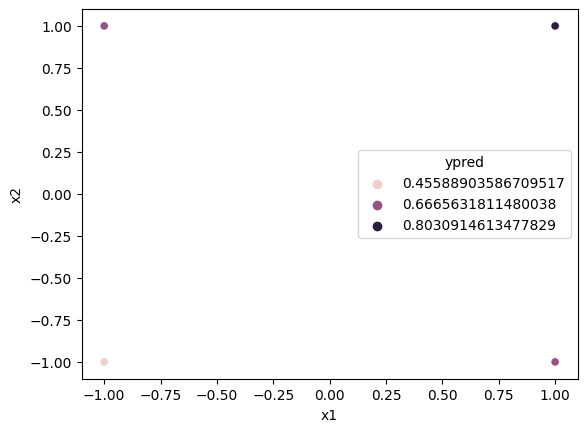

In [239]:
sns.scatterplot(predicted_xor_data,x='x1',y='x2',hue='ypred')